## Introduction
In this project, we analyze fuel consumption data from various car models between 2000 and 2022. Given rising fuel costs and current economic constraints, consumers are increasingly prioritizing fuel-efficient vehicles. Our client, Emmotoka Car Dealers, a new car dealership in Uganda with the tagline "Motor is driving made affordable," is focused on stocking vehicles that offer the best fuel efficiency and are no more than 14 years old. This study aims to uncover key trends in fuel efficiency and identify factors influencing fuel consumption, providing Emmotoka with data-driven insights to help them select the ideal inventory to meet consumer needs.


## Problem Statement
*Due to challenging economic times, consumers are increasingly seeking fuel-efficient vehicles that offer savings on long-term fuel costs. Emmotoka Car Dealers is preparing to launch a dealership in Uganda and wants to stock cars that are no more than 14 years old, with a strong emphasis on fuel efficiency. Emmotoka has provided a dataset with fuel consumption data for various car models from 2000 to 2022 and seeks guidance on identifying the most fuel-efficient models. This analysis will focus on fuel efficiency trends, the impact of different vehicle features on fuel consumption, and recommendations for the best models to stock based on these insights.*



![Emmotoka Car Dealers](Emmotoka.png)


## Objectives
1. Understanding the data(EDA)
2. Identify Factors Affecting Fuel Efficiency/Data analysis
3. Conduct Statistical Testing
4. Build a Predictive Model for Fuel Efficiency
5. Make Recommendations on Inventory


## Data Overview
*Datasets provide model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada.*

### Data Info
**Model**
- 4WD/4X4 = Four-wheel drive
- AWD = All-wheel drive
- CNG = Compressed natural gas
- FFV = Flexible-fuel vehicle
- NGV = Natural gas vehicle
- '# = High output engine that provides more power than the standard engine of the same size

**Transmission**
- A = Automatic
- AM = Automated manual
- AS = Automatic with select shift
- AV = Continuously variable
- M = Manual
- 3 - 10 = Number of gears

**Fuel Type**
- X = Regular gasoline
- Z = Premium gasoline
- D = Diesel
- E = Ethanol (E85)
- N = Natural Gas

**Fuel Consumption**
*City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) - combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per imperial gallon (mpg)
CO2 Emissions (g/km),Estimated tailpipe carbon dioxide emissions (in grams per kilometre) are based on fuel type and the combined fuel consumption rating.*

**DATA SOURCE** https://www.kaggle.com/datasets/ahmettyilmazz/fuel-consumption

## Exploring the data

In [1]:
# Loading liraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Load the data
df = pd.read_csv("../Data/Fuel_Consumption_2000_2022.csv")
df.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


In [8]:
# Basic information about the dataset
print("Basic Dataset Information")
print(f"This data set has {df.shape[0]} rows and {df.shape[1]} columns ")
print("\nColumn names and types:")
print(df.dtypes)
print("\nSummary of missing values:")
print(df.isnull().sum())

Basic Dataset Information
This data set has 22556 rows and 13 columns 

Column names and types:
YEAR                  int64
MAKE                 object
MODEL                object
VEHICLE CLASS        object
ENGINE SIZE         float64
CYLINDERS             int64
TRANSMISSION         object
FUEL                 object
FUEL CONSUMPTION    float64
HWY (L/100 km)      float64
COMB (L/100 km)     float64
COMB (mpg)            int64
EMISSIONS             int64
dtype: object

Summary of missing values:
YEAR                0
MAKE                0
MODEL               0
VEHICLE CLASS       0
ENGINE SIZE         0
CYLINDERS           0
TRANSMISSION        0
FUEL                0
FUEL CONSUMPTION    0
HWY (L/100 km)      0
COMB (L/100 km)     0
COMB (mpg)          0
EMISSIONS           0
dtype: int64


YEAR                0
MAKE                0
MODEL               0
VEHICLE CLASS       0
ENGINE SIZE         0
CYLINDERS           0
TRANSMISSION        0
FUEL                0
FUEL CONSUMPTION    0
HWY (L/100 km)      0
COMB (L/100 km)     0
COMB (mpg)          0
EMISSIONS           0
dtype: int64

In [9]:
#Brief data description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,22556.0,2011.554442,6.298269,2000.0,2006.0,2012.0,2017.000,2022.0
ENGINE SIZE,22556.0,3.356646,1.335425,0.8,2.3,3.0,4.200,8.4
CYLINDERS,22556.0,5.854141,1.819597,2.0,4.0,6.0,8.000,16.0
FUEL CONSUMPTION,22556.0,12.763513,3.500999,3.5,10.4,12.3,14.725,30.6
HWY (L/100 km),22556.0,8.919126,2.274764,3.2,7.3,8.4,10.200,20.9
COMB (L/100 km),22556.0,11.034341,2.910920,3.6,9.1,10.6,12.700,26.1
COMB (mpg),22556.0,27.374534,7.376982,11.0,22.0,27.0,31.000,78.0
EMISSIONS,22556.0,250.068452,59.355276,83.0,209.0,243.0,288.000,608.0


<Figure size 1200x800 with 0 Axes>

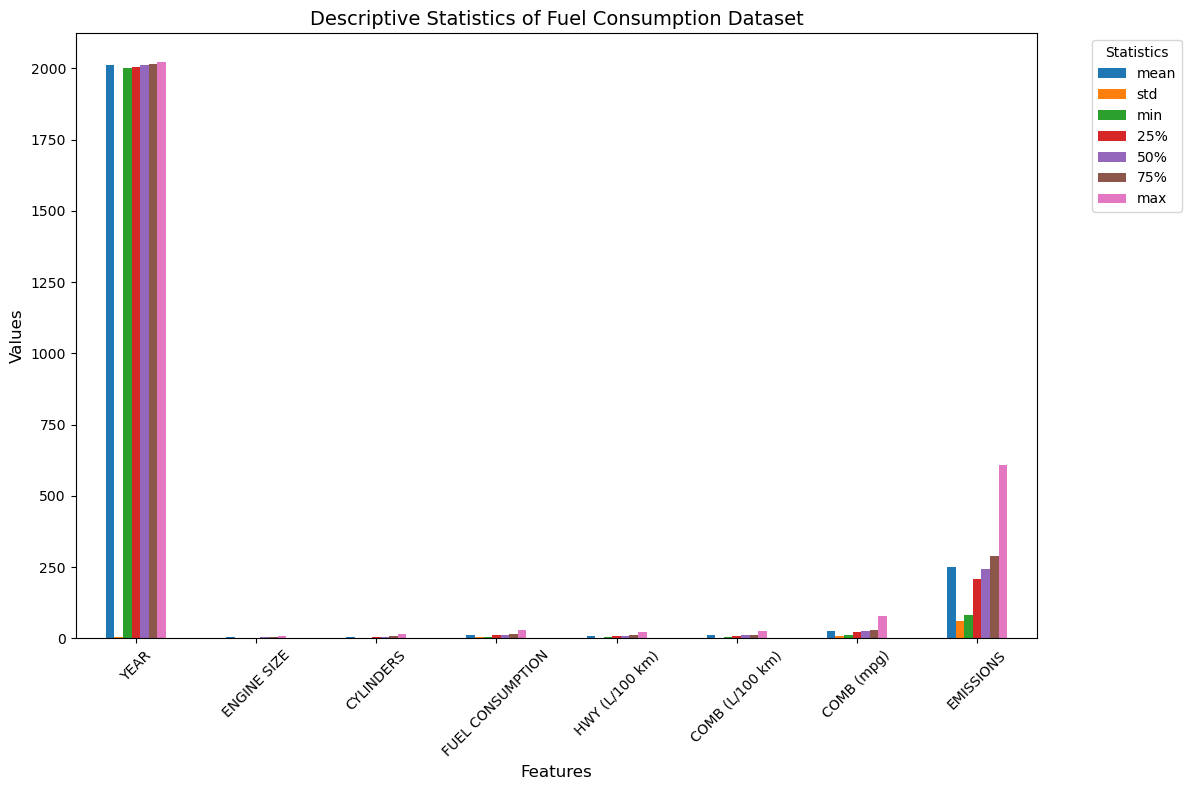

In [10]:
# Generate descriptive statistics
df_stats = df.describe()

# Transpose the DataFrame so that each feature is a row and each statistic is a column
df_stats = df_stats.T

# Select specific statistics to plot
stats_to_plot = ['mean', 'std', 'min', '25%', '50%', '75%', 'max']

# Plot selected statistics for each feature
plt.figure(figsize=(12, 8))
df_stats[stats_to_plot].plot(kind='bar', figsize=(12, 8))
plt.title('Descriptive Statistics of Fuel Consumption Dataset', fontsize=14)
plt.ylabel('Values', fontsize=12)
plt.xlabel('Features', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Statistics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show plot
plt.show()